In [2]:
import pandas as pd

#Loading dataset
df = pd.read_csv("financial_data (kaggle).csv")  

print(df.head())

   Age  Gender    Education  Income   Debt  Credit_Score  Loan_Amount  \
0   56  Female       Master  149406  34089           581        49200   
1   69  Female  High School   78896   8626           648        20147   
2   46  Female       Master  119339  46281           329        41307   
3   32    Male  High School  131067  29403           816        19019   
4   60    Male          PhD   38001  30032           673        16317   

   Loan_Term  Num_Credit_Cards Payment_History Employment_Status  \
0         60                 4             Bad        Unemployed   
1         24                 7            Good          Employed   
2         12                 8             Bad        Unemployed   
3         60                 8             Bad          Employed   
4         36                 4         Average          Employed   

  Residence_Type Marital_Status  Creditworthiness  
0         Rented         Single                 1  
1      Mortgaged        Married                 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  object
 2   Education          12000 non-null  object
 3   Income             12000 non-null  int64 
 4   Debt               12000 non-null  int64 
 5   Credit_Score       12000 non-null  int64 
 6   Loan_Amount        12000 non-null  int64 
 7   Loan_Term          12000 non-null  int64 
 8   Num_Credit_Cards   12000 non-null  int64 
 9   Payment_History    12000 non-null  object
 10  Employment_Status  12000 non-null  object
 11  Residence_Type     12000 non-null  object
 12  Marital_Status     12000 non-null  object
 13  Creditworthiness   12000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.3+ MB
None


In [4]:
print(df.describe())

                Age         Income          Debt  Credit_Score   Loan_Amount  \
count  12000.000000   12000.000000  12000.000000  12000.000000  12000.000000   
mean      43.489250   85222.009417  25354.673250    573.967583  25113.951250   
std       14.908982   37640.043409  14087.390846    157.816052  14247.092051   
min       18.000000   20026.000000   1001.000000    300.000000    501.000000   
25%       31.000000   52400.750000  13161.000000    437.000000  12725.000000   
50%       43.000000   85756.000000  25382.500000    574.000000  25220.500000   
75%       56.000000  117754.750000  37497.500000    709.000000  37348.000000   
max       69.000000  149984.000000  49995.000000    849.000000  49996.000000   

          Loan_Term  Num_Credit_Cards  Creditworthiness  
count  12000.000000      12000.000000      12000.000000  
mean      35.943000          4.985833          0.702583  
std       16.965162          2.593458          0.457140  
min       12.000000          1.000000          

In [6]:
#check for class imbalance
print(df['Creditworthiness'].value_counts())

Creditworthiness
1    8431
0    3569
Name: count, dtype: int64


In [9]:
#Handle missing values
df = df.dropna()

#encoding categorical features
df = pd.get_dummies(df, drop_first=True)

In [12]:
#Normalizing Numerical Features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Income', 'Loan_Amount', 'Debt', 'Credit_Score', 'Age']  
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
X = df.drop('Creditworthiness', axis=1)
y = df['Creditworthiness']

In [15]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
#Model training
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [19]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
#Model evaluation
from sklearn.metrics import classification_report, roc_auc_score

#Logistic Regression
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       714
           1       0.70      1.00      0.83      1686

    accuracy                           0.70      2400
   macro avg       0.35      0.50      0.41      2400
weighted avg       0.49      0.70      0.58      2400

ROC AUC: 0.5194873916351832


In [24]:
#Decision Tree

y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

Decision Tree:
               precision    recall  f1-score   support

           0       0.30      0.33      0.31       714
           1       0.70      0.67      0.69      1686

    accuracy                           0.57      2400
   macro avg       0.50      0.50      0.50      2400
weighted avg       0.58      0.57      0.58      2400

ROC AUC: 0.5014578785250756


In [25]:
#Random Forest

y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest:
               precision    recall  f1-score   support

           0       0.35      0.01      0.02       714
           1       0.70      0.99      0.82      1686

    accuracy                           0.70      2400
   macro avg       0.53      0.50      0.42      2400
weighted avg       0.60      0.70      0.58      2400

ROC AUC: 0.5059112613016736


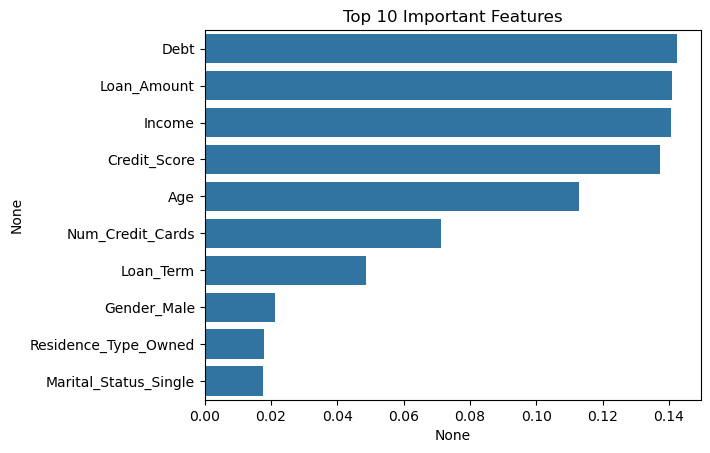

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot top features
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()